In [1]:
from estiminator import our_method,trans_lasso,t_lasso
from evaluator import *
from tqdm import tqdm
from matplotlib import pyplot as plt

## 代码测试

In [9]:
# 先测试一下our_method
n_features=500
n_packs=21
n_samples=100
s=20
L=10

eval1=evaluator(n_features, n_packs, n_samples, s, L)   

### Trans-lasso方法，但没有aggregation(实际为hoc l1-transfer)

In [10]:
trans_lasso_method=trans_lasso(n_features)
SSE2=eval1.indep_eval(trans_lasso_method)
SSE2

c:\Users\69151\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.615e-02, tolerance: 1.357e-02
  model = cd_fast.enet_coordinate_descent(


0.5556698303740994

In [7]:
trans_lasso_method.get_params()

array([ 0.40414435,  0.27483339,  0.        ,  0.        ,  0.27955912,
        0.25735898,  0.33718555,  0.27355835,  0.        ,  0.26664023,
        0.38260721,  0.33520079,  0.3009881 ,  0.3509127 ,  0.34090417,
        0.29846057,  0.37895748,  0.40508576,  0.38014631,  0.37620026,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

### A方法

In [11]:
#模型拟合
alg = our_method(n_features)
SSE=eval1.indep_eval(alg)
SSE

0.19778054274386603

In [6]:
alg.get_params()

array([0.30195904, 0.43809629, 0.36889162, 0.32014107, 0.37436044,
       0.32505759, 0.49214548, 0.43333289, 0.47233611, 0.32654017,
       0.42351567, 0.45537097, 0.37005015, 0.38214776, 0.42212204,
       0.39392167, 0.35139426, 0.35906592, 0.41327595, 0.33132753,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### 传统lasso，仅使用目标模型的样本

In [12]:
alg=t_lasso(n_features)
SSE3=eval1.indep_eval(alg)
SSE3

1.8532379545816897

In [9]:
alg.get_params()

array([0.22909041, 0.21378838, 0.24745343, 0.21669162, 0.19179097,
       0.28195744, 0.29051268, 0.21198103, 0.30279696, 0.30809567,
       0.28046342, 0.27698191, 0.24996627, 0.26380584, 0.27868791,
       0.2772455 , 0.26406081, 0.28851274, 0.28723615, 0.23339547,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## 分情况可视化算法效果

### 独立、同质
$\Sigma = E, \ |\beta|_0 = 16, \ p=500, \ n_0=150, \ n_1,...,n_K=100, \ K=20, \ $   

$\varepsilon \sim N(0,1)$

#### 第一种情况：
$For\ a\ given\ A, \ w^{k}_j=\beta_j -0.3*I(j\in H_k),k \in A \ $   
$|H_k|=h \in \{2,6,12\}, \ H_k \subseteq A$

$w^{k}_j=\beta_j -0.5*I(j\in H_k),k \in A^c$   
$|H_k|=2s, \ H_k \subseteq A^c$

\# $w_1=-0.3$   

$|A|=0,4,8,...20$



In [2]:
n_features=500
n_samples=100
n_packs=21
s=16

In [10]:
#evaluator.t11_eval(alg)
# A_alg=our_method(n_features)
# Trans_lasso=trans_lasso(n_features)
# lasso=t_lasso(n_features)
models=[our_method(n_features),trans_lasso(n_features),t_lasso(n_features)]
SSE=np.zeros((3,3,6))
#L=2,4,8,12,16,20 -?没有做L=0的代码
#多次实验取平均
for i in tqdm(range(100)):
    for h in [2,6,12]:
        for L in tqdm([2,4,8,12,16,20]):
            eval=evaluator(n_features, n_packs, n_samples, s, L)
            for model in models:
                model_sse=eval.t11_eval(model,h)
                SSE[int(h/6),models.index(model),int(L/4)]+=model_sse
    break
SSE=SSE/(i+1)
        

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\69151\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2541: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
u:\文档\code\讨论班\11-14\simulation\evaluator.py:111: RuntimeWarning: overflow encountered in square
  SSE = np.sum((coef_true - pre_params)**2)
100%|██████████| 6/6 [00:41<00:00,  6.87s/it]
c:\Users\69151\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.345e-02, tolerance: 2.164e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\69151\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

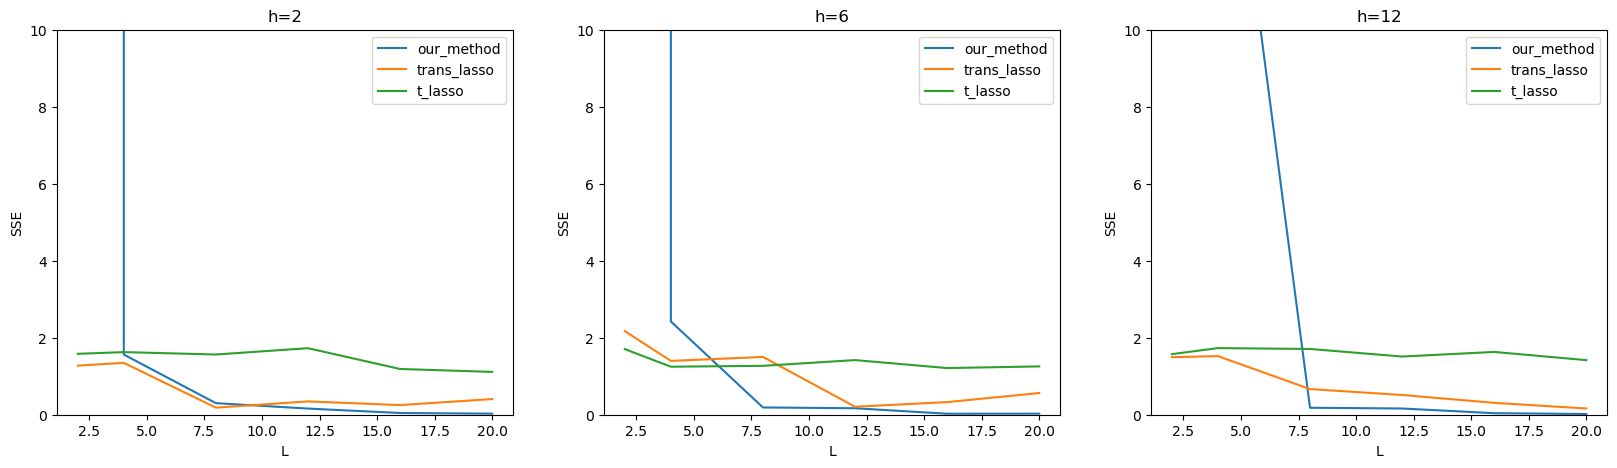

In [33]:
#画图，横轴是L，纵轴是SSE，依照h分三张图
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot([2,4,8,12,16,20],SSE[0,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[0,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[0,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,10)
plt.title('h=2') 

plt.subplot(1,3,2)
plt.plot([2,4,8,12,16,20],SSE[1,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[1,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[1,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,10)
plt.title('h=6')

plt.subplot(1,3,3)
plt.plot([2,4,8,12,16,20],SSE[2,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[2,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[2,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,10)
plt.title('h=12') 

#设置图像大小
plt.show()

A方法在L较小时出现了一些问题

#### 第二种情况：
$H_k={1,2,...,100}$   
$For\ a\ given\ A,\ w^{k}_j=\beta_j +\xi_j*I(j\in H_k),\ \xi_j \sim N(0,h/100),\  k \in A \ ,\ h \in \{2,6,12\}$   
$w^{k}_j=\beta_j +\xi_j*I(j\in H_k),\ \xi_j \sim N(0,2s/100),\  k \in A^c \ $   

\# $w_1=-0.3$

In [3]:
#evaluator.t12_eval(alg)
models=[our_method(n_features),trans_lasso(n_features),t_lasso(n_features)]
SSE=np.zeros((3,3,6))
#L=2,4,8,12,16,20 -?没有做L=0的代码
#多次实验取平均
for i in tqdm(range(100)):
    for h in [2,6,12]:
        for L in tqdm([2,4,8,12,16,20]):
            eval=evaluator(n_features, n_packs, n_samples, s, L)
            for model in models:
                model_sse=eval.t12_eval(model,h)
                SSE[int(h/6),models.index(model),int(L/4)]+=model_sse
    break
SSE=SSE/(i+1)
        

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\69151\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2541: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
u:\文档\code\讨论班\11-14\simulation\evaluator.py:109: RuntimeWarning: overflow encountered in square
  SSE = np.sum((coef_true - pre_params)**2)
100%|██████████| 6/6 [00:38<00:00,  6.34s/it]
c:\Users\69151\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.858e-02, tolerance: 2.070e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\69151\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

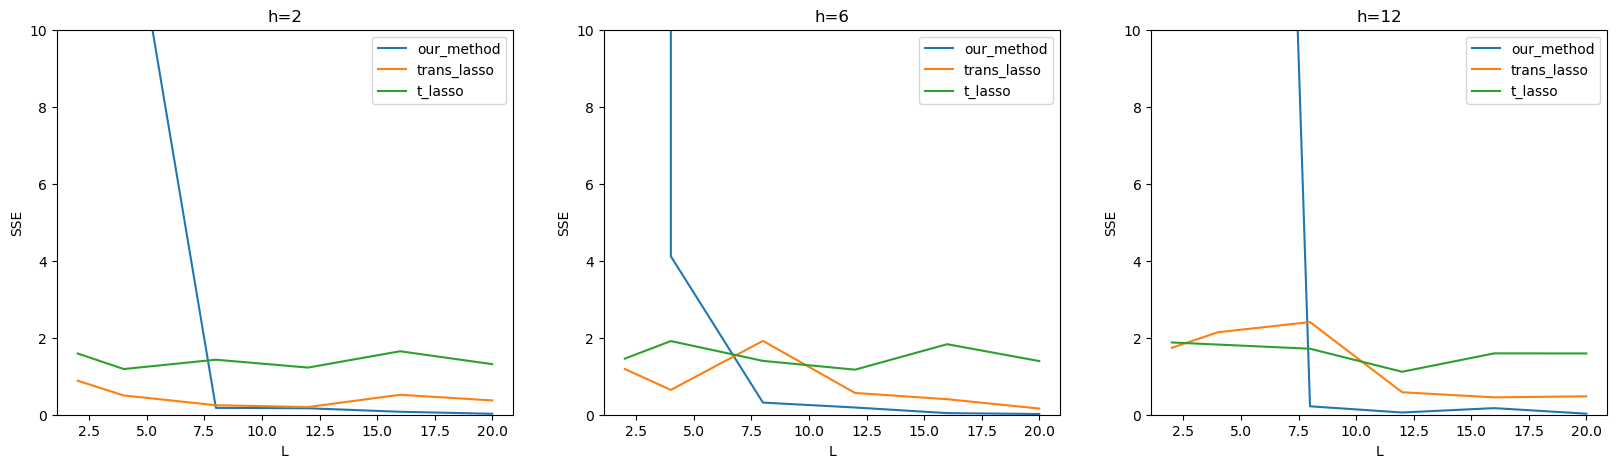

In [4]:
#画图，横轴是L，纵轴是SSE，依照h分三张图
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot([2,4,8,12,16,20],SSE[0,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[0,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[0,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,10)
plt.title('h=2') 

plt.subplot(1,3,2)
plt.plot([2,4,8,12,16,20],SSE[1,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[1,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[1,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,10)
plt.title('h=6')

plt.subplot(1,3,3)
plt.plot([2,4,8,12,16,20],SSE[2,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[2,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[2,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,10)
plt.title('h=12') 

#设置图像大小
plt.show()

### 不独立，同质
$for\ a\ given\ A,\ \Sigma^{(k)}_{j,j}=1,\ \Sigma^{(k)}_{j,i}=0.8,\ i \neq j\ ,\ k \in A\cup {0}$    
$\Sigma^{(k)}_{1,}=(1,\frac{1}{k+1},\frac{1}{k+1},...,\frac{1}{k+1},0_{p-2k})\ ,\ k \in (A\cup {0})^c$

#### 第一种情况：

In [3]:
#evaluator.t21_eval(alg)
models=[our_method(n_features),trans_lasso(n_features),t_lasso(n_features)]
SSE=np.zeros((3,3,6))
#L=2,4,8,12,16,20 -?没有做L=0的代码
#多次实验取平均
for i in tqdm(range(100)):
    for h in [2,6,12]:
        for L in tqdm([2,4,8,12,16,20]):
            eval=evaluator(n_features, n_packs, n_samples, s, L)
            for model in models:
                model_sse=eval.t21_eval(model,h)
                SSE[int(h/6),models.index(model),int(L/4)]+=model_sse
    break
SSE=SSE/(i+1)

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\69151\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.050e+00, tolerance: 1.344e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\69151\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.749e-01, tolerance: 1.596e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\69151\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

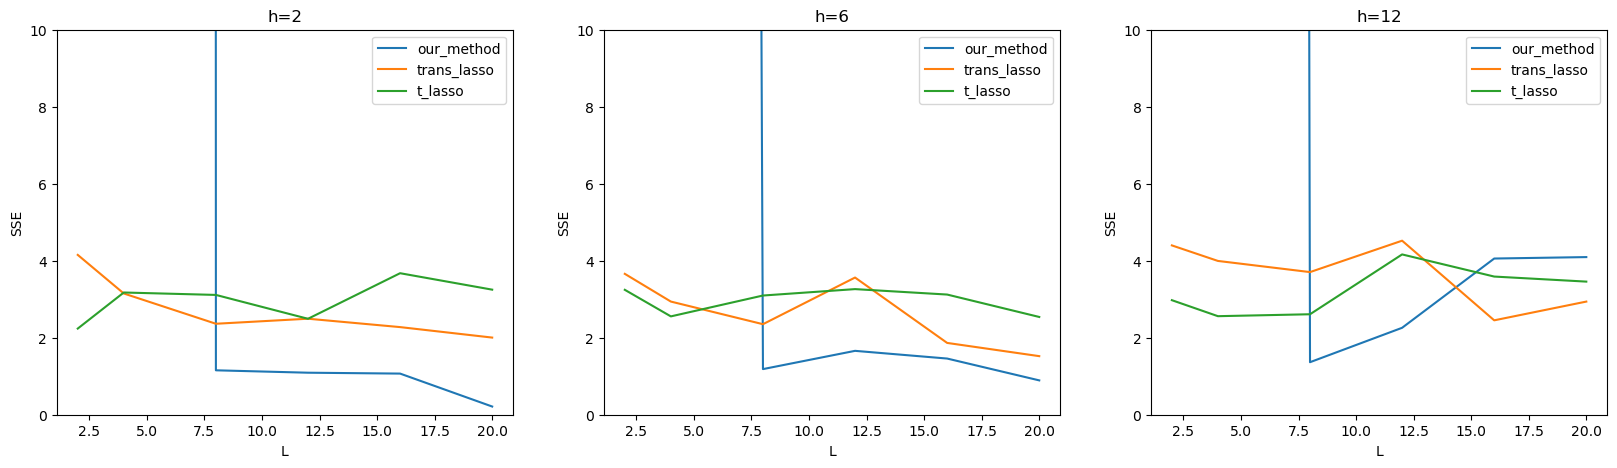

In [4]:
#画图，横轴是L，纵轴是SSE，依照h分三张图
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot([2,4,8,12,16,20],SSE[0,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[0,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[0,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,10)
plt.title('h=2') 

plt.subplot(1,3,2)
plt.plot([2,4,8,12,16,20],SSE[1,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[1,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[1,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,10)
plt.title('h=6')

plt.subplot(1,3,3)
plt.plot([2,4,8,12,16,20],SSE[2,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[2,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[2,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,10)
plt.title('h=12') 

#设置图像大小
plt.show()

#### 第二种情况：

In [5]:
#evaluator.t22_eval(alg)
models=[our_method(n_features),trans_lasso(n_features),t_lasso(n_features)]
SSE=np.zeros((3,3,6))
#L=2,4,8,12,16,20 -?没有做L=0的代码
#多次实验取平均
for i in tqdm(range(100)):
    for h in [2,6,12]:
        for L in tqdm([2,4,8,12,16,20]):
            eval=evaluator(n_features, n_packs, n_samples, s, L)
            for model in models:
                model_sse=eval.t22_eval(model,h)
                SSE[int(h/6),models.index(model),int(L/4)]+=model_sse
    break
SSE=SSE/(i+1)

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\69151\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.761e+00, tolerance: 1.827e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\69151\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.285e-01, tolerance: 1.253e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\69151\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

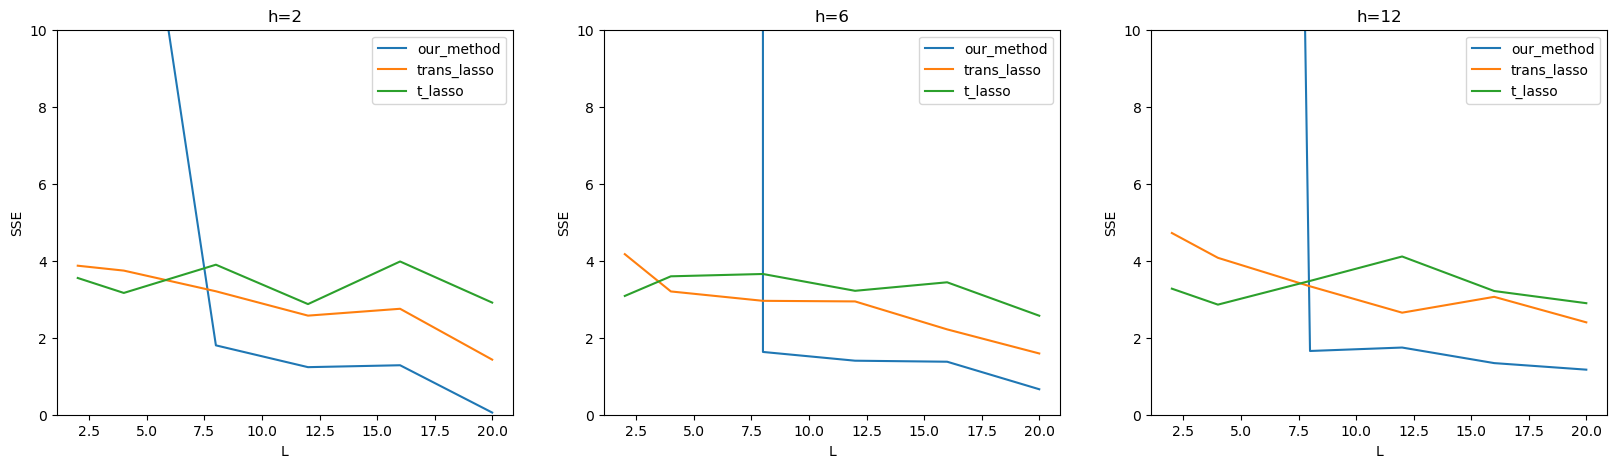

In [6]:
#画图，横轴是L，纵轴是SSE，依照h分三张图
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot([2,4,8,12,16,20],SSE[0,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[0,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[0,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,10)
plt.title('h=2') 

plt.subplot(1,3,2)
plt.plot([2,4,8,12,16,20],SSE[1,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[1,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[1,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,10)
plt.title('h=6')

plt.subplot(1,3,3)
plt.plot([2,4,8,12,16,20],SSE[2,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[2,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[2,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,10)
plt.title('h=12') 

#设置图像大小
plt.show()

### 不独立，不同质
$\Sigma^{(k)}_{j,j}=1,\ \Sigma^{(k)}_{j,i}=0,\ i \neq j\ ,\ k=0$    
$\Sigma^{(k)}_{1,}=(1,\frac{1}{k+1},\frac{1}{k+1},...,\frac{1}{k+1},0_{p-2k})\ ,\ k\neq 0$

#### 第一种情况：

In [5]:
#evaluator.t31_eval(alg)
models=[our_method(n_features),trans_lasso(n_features),t_lasso(n_features)]
SSE=np.zeros((3,3,6))
#L=2,4,8,12,16,20 -?没有做L=0的代码
#多次实验取平均
for i in tqdm(range(100)):
    for h in [2,6,12]:
        for L in tqdm([2,4,8,12,16,20]):
            eval=evaluator(n_features, n_packs, n_samples, s, L)
            for model in models:
                model_sse=eval.t31_eval(model,h)
                SSE[int(h/6),models.index(model),int(L/4)]+=model_sse
    break
SSE=SSE/(i+1)

100%|██████████| 6/6 [01:03<00:00, 10.52s/it]
c:\Users\69151\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.237e-02, tolerance: 2.103e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\69151\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.650e-02, tolerance: 1.605e-02
  model = cd_fast.enet_coordinate_descent(
100%|██████████| 6/6 [01:01<00:00, 10.29s/it]
c:\Users\69151\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the s

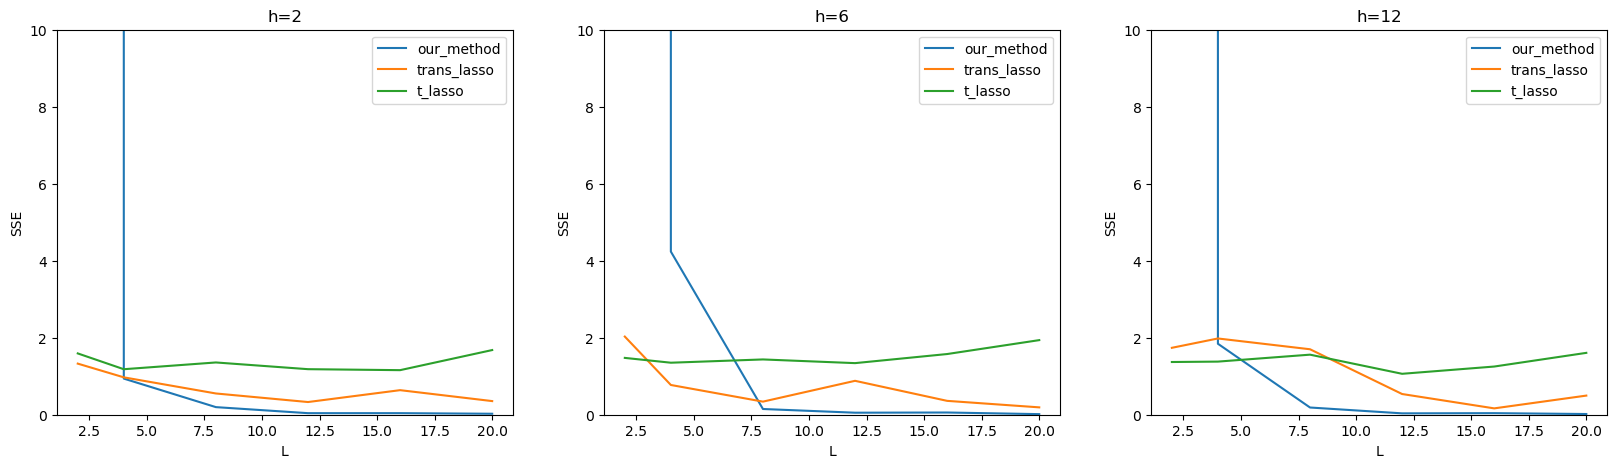

In [6]:
#画图，横轴是L，纵轴是SSE，依照h分三张图
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot([2,4,8,12,16,20],SSE[0,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[0,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[0,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,10)
plt.title('h=2') 

plt.subplot(1,3,2)
plt.plot([2,4,8,12,16,20],SSE[1,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[1,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[1,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,10)
plt.title('h=6')

plt.subplot(1,3,3)
plt.plot([2,4,8,12,16,20],SSE[2,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[2,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[2,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,10)
plt.title('h=12') 

#设置图像大小
plt.show()

#### 第二种情况：

In [7]:
#evaluator.t32_eval(alg)
models=[our_method(n_features),trans_lasso(n_features),t_lasso(n_features)]
SSE=np.zeros((3,3,6))
#L=2,4,8,12,16,20 -?没有做L=0的代码
#多次实验取平均
for i in tqdm(range(100)):
    for h in [2,6,12]:
        for L in tqdm([2,4,8,12,16,20]):
            eval=evaluator(n_features, n_packs, n_samples, s, L)
            for model in models:
                model_sse=eval.t32_eval(model,h)
                SSE[int(h/6),models.index(model),int(L/4)]+=model_sse
    break
SSE=SSE/(i+1)

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\69151\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2541: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
u:\文档\code\讨论班\11-14\simulation\evaluator.py:205: RuntimeWarning: overflow encountered in square
  SSE = np.sum((coef_true - pre_params)**2)
c:\Users\69151\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.827e-02, tolerance: 2.132e-02
  model = cd_fast.enet_coordinate_descent(
100%|██████████| 6/6 [01:03<00:00, 10.60s/it]
c:\Users\69151\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

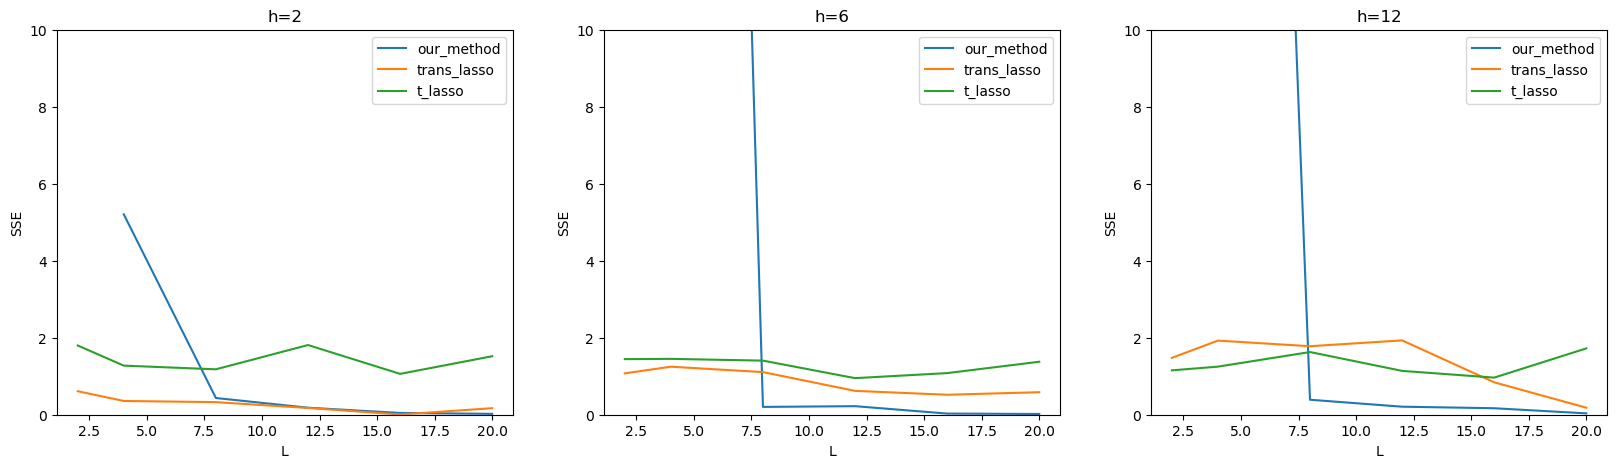

In [8]:
#画图，横轴是L，纵轴是SSE，依照h分三张图
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot([2,4,8,12,16,20],SSE[0,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[0,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[0,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,10)
plt.title('h=2') 

plt.subplot(1,3,2)
plt.plot([2,4,8,12,16,20],SSE[1,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[1,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[1,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,10)
plt.title('h=6')

plt.subplot(1,3,3)
plt.plot([2,4,8,12,16,20],SSE[2,0,:],label='our_method')
plt.plot([2,4,8,12,16,20],SSE[2,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20],SSE[2,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,10)
plt.title('h=12') 

#设置图像大小
plt.show()

## 下面是测试块

In [11]:
#进行一次简单的岭回归估计试一下
X0=samples_packs[0].X
y0=samples_packs[0].y
SSE_min=10000
lamb_min=0
#lambda从0.01到1，每次增加0.01
for lamb in tqdm(np.arange(0.01,1,0.01)):
    pre_params_ridge = np.linalg.inv(X0.T.dot(X0)+lamb*np.eye(n_features)).dot(X0.T).dot(y0)
    SSE = np.sum((coef_true - pre_params_ridge)**2)
    if SSE<SSE_min:
        SSE_min=SSE
        lamb_min=lamb
lamb_min

100%|██████████| 99/99 [00:00<00:00, 157.86it/s]


0.99

In [12]:
SSE_min

1.4029731819095923

In [13]:
#用lasso估计一下
from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)
clf.fit(X0, y0)
pre_params_lasso = clf.coef_
SSE = np.sum((coef_true - pre_params_lasso)**2)
SSE

0.6825324897184395

In [14]:
pre_params_lasso

array([ 0.22375028,  0.        ,  0.21454205,  0.21331928,  0.1277337 ,
        0.        ,  0.1503269 ,  0.16700871,  0.09620099,  0.0589574 ,
        0.3091759 ,  0.18640722,  0.09360077,  0.31253269,  0.16865349,
        0.02387341,  0.2287742 ,  0.10324739,  0.25345693,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.03621115,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.05410852,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.  

In [8]:
samples_packs=eval1.samples_packs
coef_true = np.zeros(n_features)
coef_true[:s] = 0.3
alg = trans_lasso(n_features)

#模型拟合
# pre_params3,GL= alg.fit(samples_packs,s,L)
alg.fit(samples_packs,s,L)  
pre_params3=alg.get_params()
#计算coef_true与pre_params的SSE
SSE2 = np.sum((coef_true - pre_params3)**2)

ValueError: operands could not be broadcast together with shapes (500,) (100,) 

In [8]:
SSE2

0.2382385374271591

In [9]:
pre_params3

array([ 0.11076907,  0.34610735,  0.14739599,  0.11484428,  0.14926489,
        0.1333949 ,  0.12472282,  0.05437824,  0.16910212,  0.10332669,
        0.07131223,  0.17313312,  0.13977473,  0.1547041 ,  0.03299159,
        0.09390553,  0.25164876,  0.07783258,  0.17943692,  0.30392841,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.06994574,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.05744867, -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.03971903,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [18]:
GL

array([ 6, 15,  1, 19, 13, 10,  8, 18, 16, 12], dtype=int64)

In [12]:
#将pre_params3的前s大个保留
pre_params3[np.argsort(pre_params3)[::-1][s:]]=0
pre_params3

array([0.16706793, 0.20144954, 0.18742403, 0.20721613, 0.19272945,
       0.24494414, 0.20883315, 0.19952721, 0.20482372, 0.21841723,
       0.18560654, 0.25540612, 0.17636769, 0.20297272, 0.21256791,
       0.19505391, 0.19392895, 0.2178195 , 0.19483663, 0.20142783,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
#计算sse
SSE2 = np.sum((coef_true - pre_params3)**2)
SSE2

0.19918930561010129